# Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Dataset

In [2]:
df = pd.read_csv('titanic_data.csv')

In [3]:
# row 891 coloum 12
df.shape

(891, 12)

In [4]:
# data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# showing first coloum all row title
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
# missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# null value add
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# row dropped
df.drop(columns =['Cabin'], inplace=True)

# or
# df = df.drop(['Id'], axis=1)

In [9]:
# age er missing gulo mean dea replace kora holo
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [10]:
# embarked er values add kora holo
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# Cabis S sobche beshi tai missing gulo S dea replace kora holo
df["Embarked"].fillna('S', inplace = True)

In [12]:
# sibsp er values add kora holo
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
# parch er values add kora holo
# parents with child
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
df['Survived'] = df ['Survived'].astype('category')
df['Pclass'] = df ['Pclass'].astype('category')
df['Sex'] = df ['Sex'].astype('category')
df['Age'] = df ['Age'].astype('int')
df['Embarked'] = df ['Embarked'].astype('category')

In [15]:
# no missing value + category change all
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [16]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


# Visualization

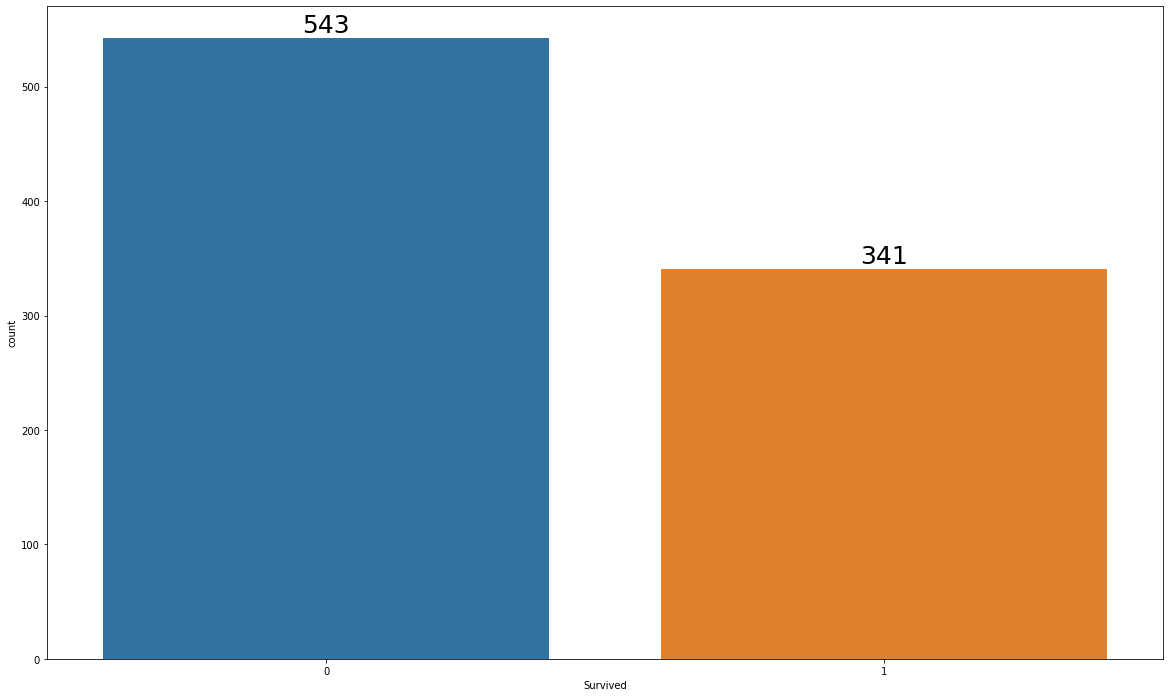

In [56]:
plt.figure(figsize=(20, 12))
sns.countplot(x="Survived", data=df)
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), color='black', fontsize=25, ha='center', va='bottom')
plt.show()

In [19]:
death_percent = round((df['Survived'].value_counts().values[0]/891)*100)

In [20]:
print('Out of 891 only {} people died in the accident'.format(death_percent))

Out of 891 only 62 people died in the accident


3    54.882155
1    23.793490
2    20.538721
Name: Pclass, dtype: float64


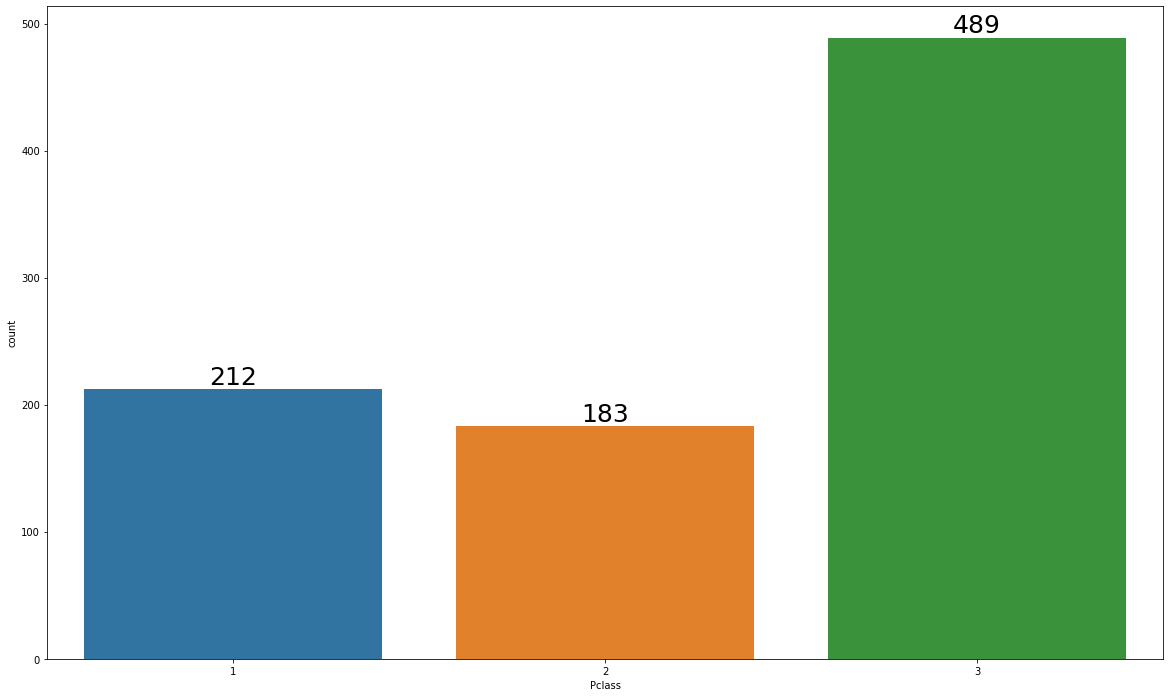

In [58]:
print((df['Pclass'].value_counts()/891)*100)
plt.figure(figsize=(20, 12))
sns.countplot(df['Pclass'])
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), color='black', fontsize=25, ha='center', va='bottom')
plt.show()

male      63.973064
female    35.241302
Name: Sex, dtype: float64


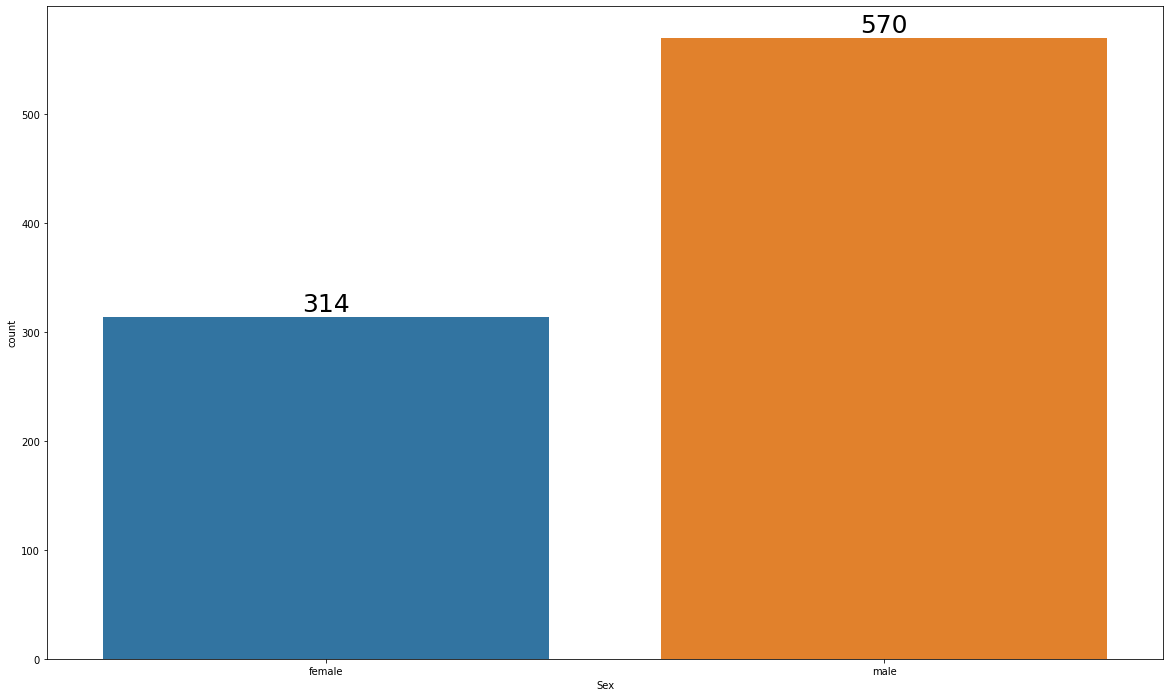

In [59]:
plt.figure(figsize=(20, 12))
print((df['Sex'].value_counts()/891)*100)
sns.countplot(df['Sex'])
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), color='black', fontsize=25, ha='center', va='bottom')
plt.show()

0    67.564534
1    23.344557
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


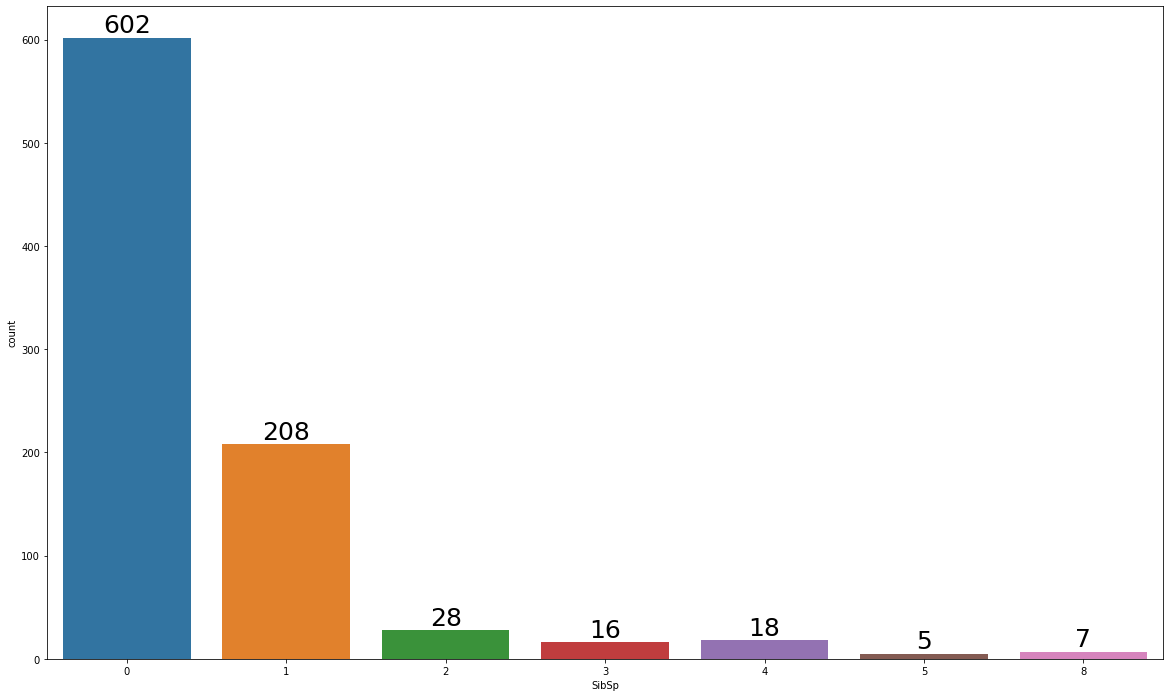

In [60]:
plt.figure(figsize=(20, 12))
print((df['SibSp'].value_counts()/891)*100)
sns.countplot(df['SibSp'])
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), color='black', fontsize=25, ha='center', va='bottom')
plt.show()

0    75.420875
1    13.131313
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


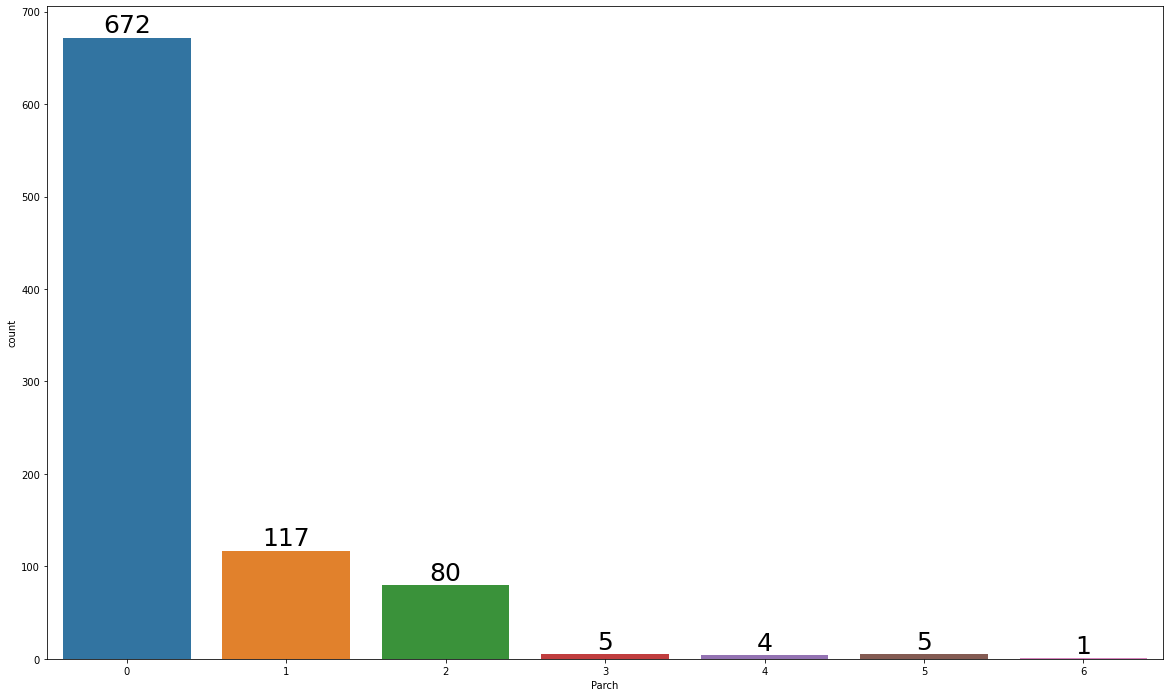

In [62]:
plt.figure(figsize=(20, 12))
print((df['Parch'].value_counts()/891)*100)
sns.countplot(df['Parch'])
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), color='black', fontsize=25, ha='center', va='bottom')
plt.show()

S    72.053872
C    18.630752
Q     8.529742
Name: Embarked, dtype: float64


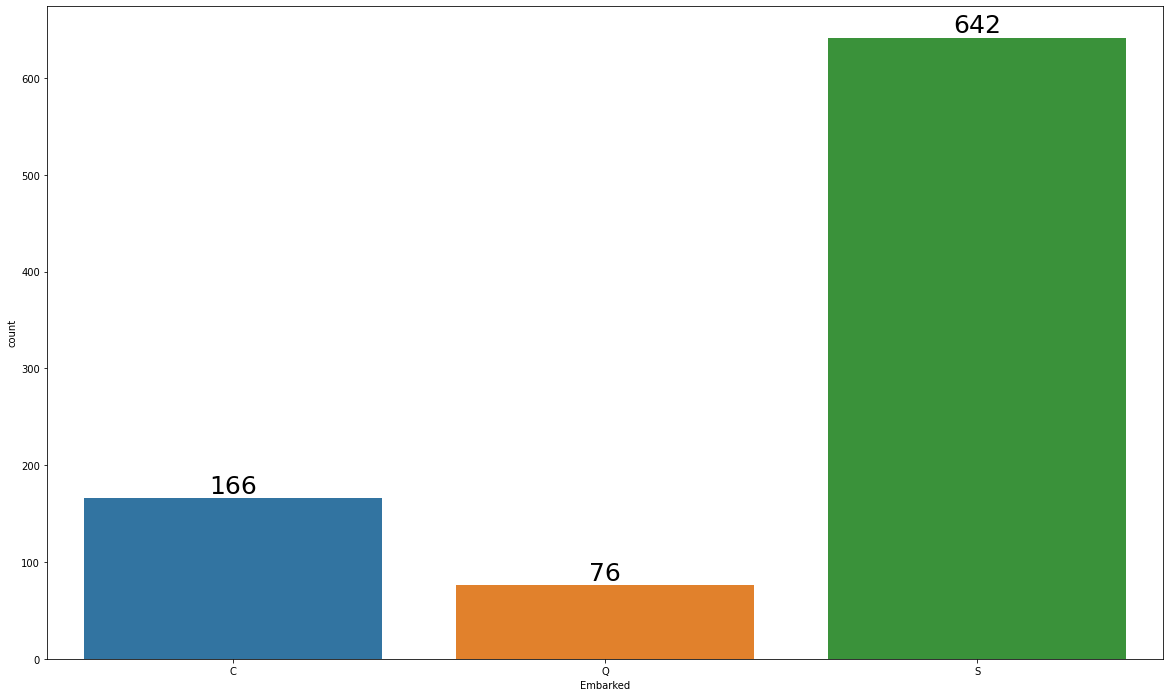

In [64]:
plt.figure(figsize=(20, 12))
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(df['Embarked'])
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), color='black', fontsize=25, ha='center', va='bottom')
plt.show()

In [26]:
print(df['Embarked'].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


skew 0.45956263424701577
kurt 0.9865867453652877


<Figure size 1440x720 with 0 Axes>

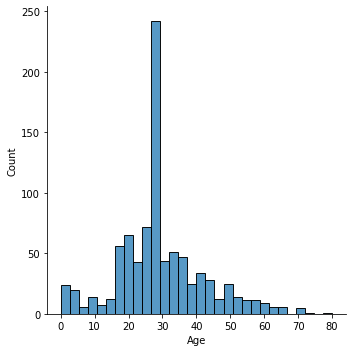

In [27]:
age = sns.displot(df['Age'])
print('skew', df['Age'].skew())  # -.5 to .5 normal
print('kurt', df['Age'].kurt())

AxesSubplot(0.125,0.125;0.775x0.755)


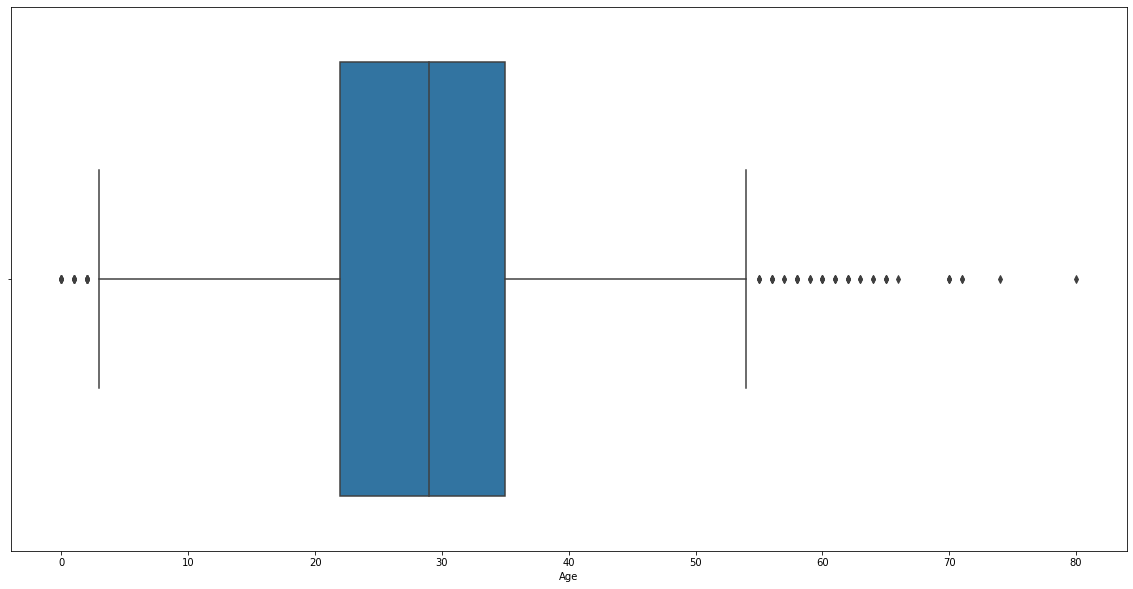

In [28]:
plt.figure(figsize=(20, 10))
box_plot1 = sns.boxplot(df['Age'])
print(box_plot1)

AxesSubplot(0.125,0.125;0.775x0.755)


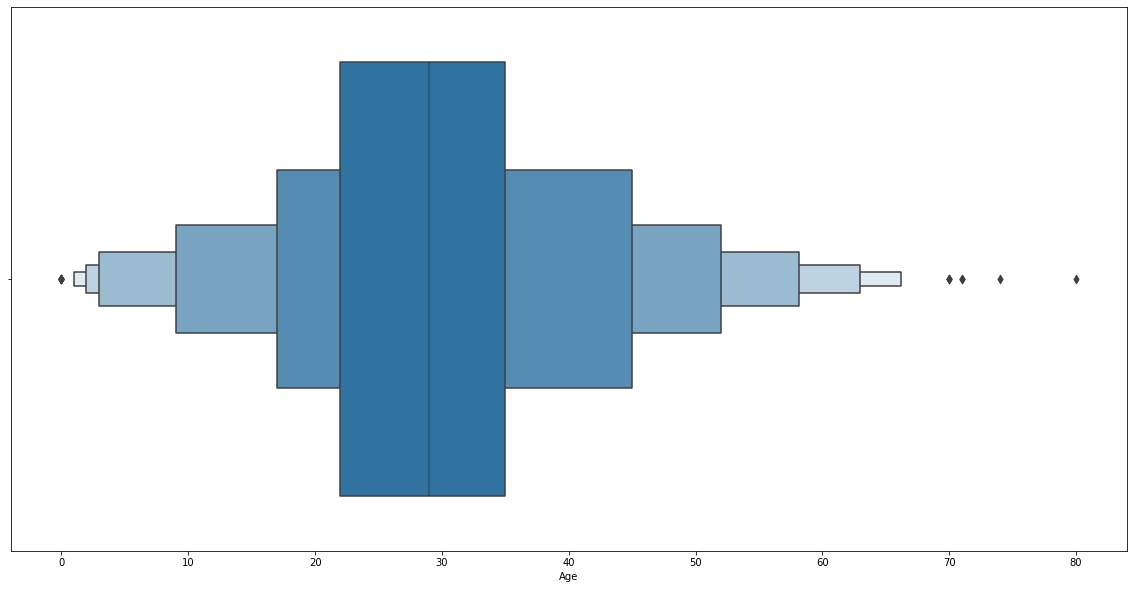

In [29]:
plt.figure(figsize=(20, 10))
box_plot = sns.boxenplot(df['Age'])
print(box_plot)

In [30]:
print('People with age between 60 and 70 are', df[(df['Age'] > 60) & (df['Age'] < 70) & (df['Age'] <= 75)].shape[0])

People with age between 60 and 70 are 15


In [31]:
print('People with age between 60 and 70 are', df[df['Age']>=70 & (df['Age']<=75)].shape[0])

People with age between 60 and 70 are 891


In [32]:
print('People with age between 60 and 70 are', df[df['Age']>75].shape[0])

People with age between 60 and 70 are 1


In [33]:
print('People with age between 0 to 1 is', df[df['Age']<1].shape[0])

People with age between 0 to 1 is 7


8.0500     4.826038
13.0000    4.713805
7.8958     4.264871
7.7500     3.815937
26.0000    3.479237
             ...   
35.0000    0.112233
28.5000    0.112233
6.2375     0.112233
14.0000    0.112233
10.5167    0.112233
Name: Fare, Length: 248, dtype: float64

skew 4.787316519674893
kurt 33.39814088089868


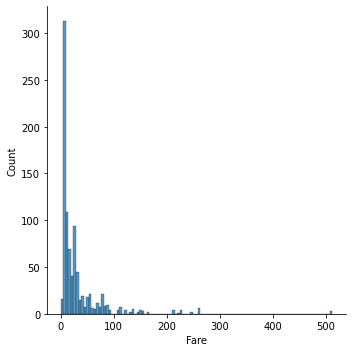

In [34]:
print((df['Fare'].value_counts()/891)*100)
fare = sns.displot(df['Fare'])
print(fare)
print()
print('skew', df['Fare'].skew())
print('kurt', df['Fare'].kurt())

AxesSubplot(0.125,0.125;0.775x0.755)


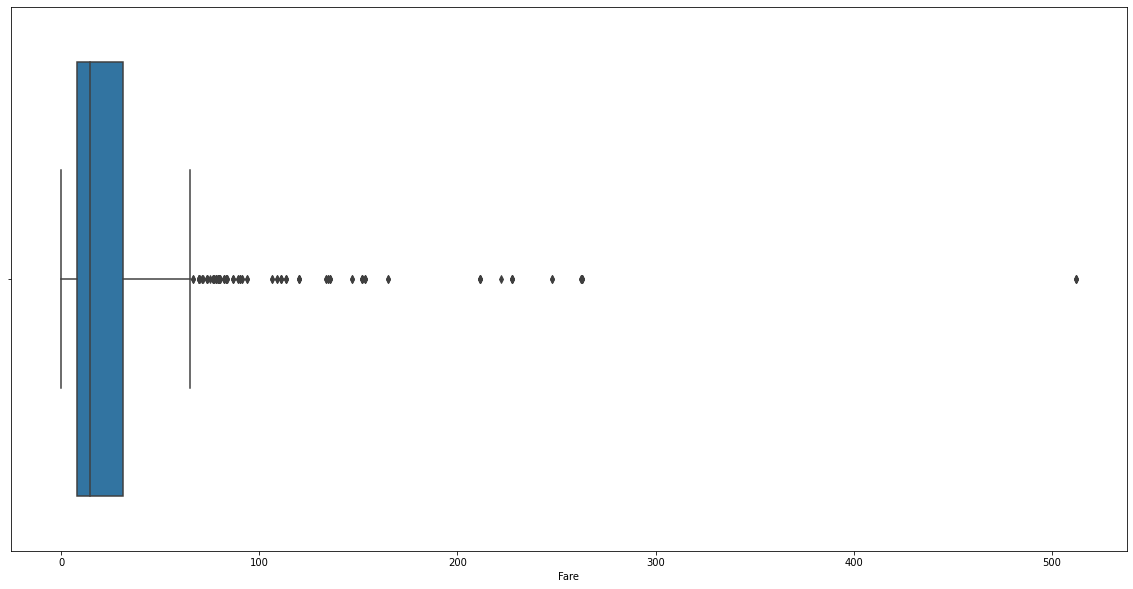

In [35]:
plt.figure(figsize=(20, 10))
fare_box = sns.boxplot(df['Fare'])
print(fare_box)

In [36]:
print('People with fare between 200$ and 300$ are', df[(df['Fare'] > 200) & (df['Fare'] < 300)].shape[0])

People with fare between 200$ and 300$ are 17


In [37]:
print('People with fare greater than 300$ is', df[(df['Fare']>300)].shape[0])

People with fare greater than 300$ is 3


# Survival with Pclass

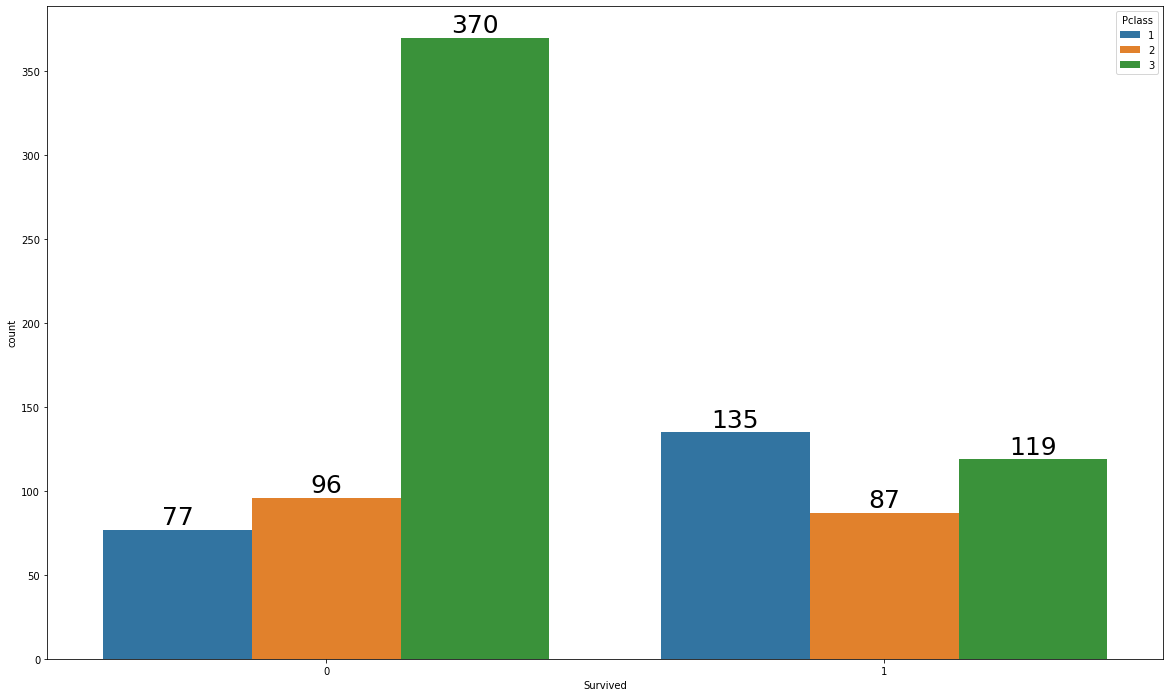

In [66]:
plt.figure(figsize=(20, 12))
survival_with_pclass = sns.countplot(df['Survived'], hue = df['Pclass'])
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis = 1)

ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), color='black', fontsize=25, ha='center', va='bottom')
plt.show()

In [39]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


# Survival with Sex

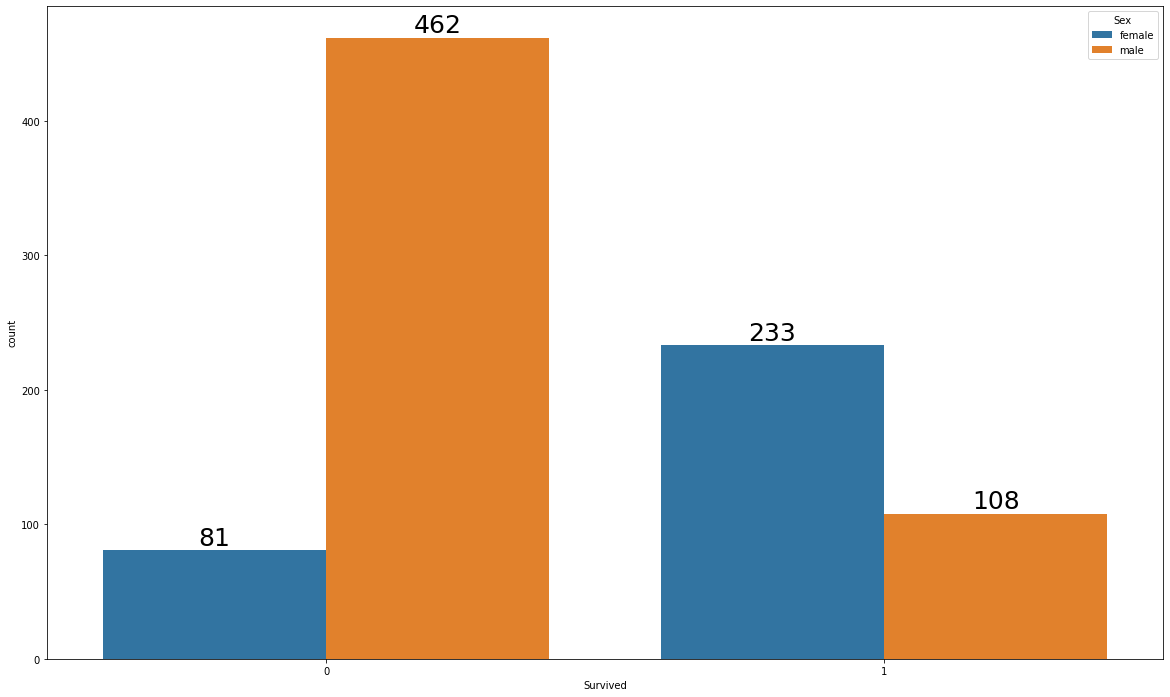

In [68]:
plt.figure(figsize=(20, 12))
survival_with_sex = sns.countplot(df['Survived'], hue = df['Sex'])
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis = 1)

ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), color='black', fontsize=25, ha='center', va='bottom')
plt.show()

# Survival with Embarked

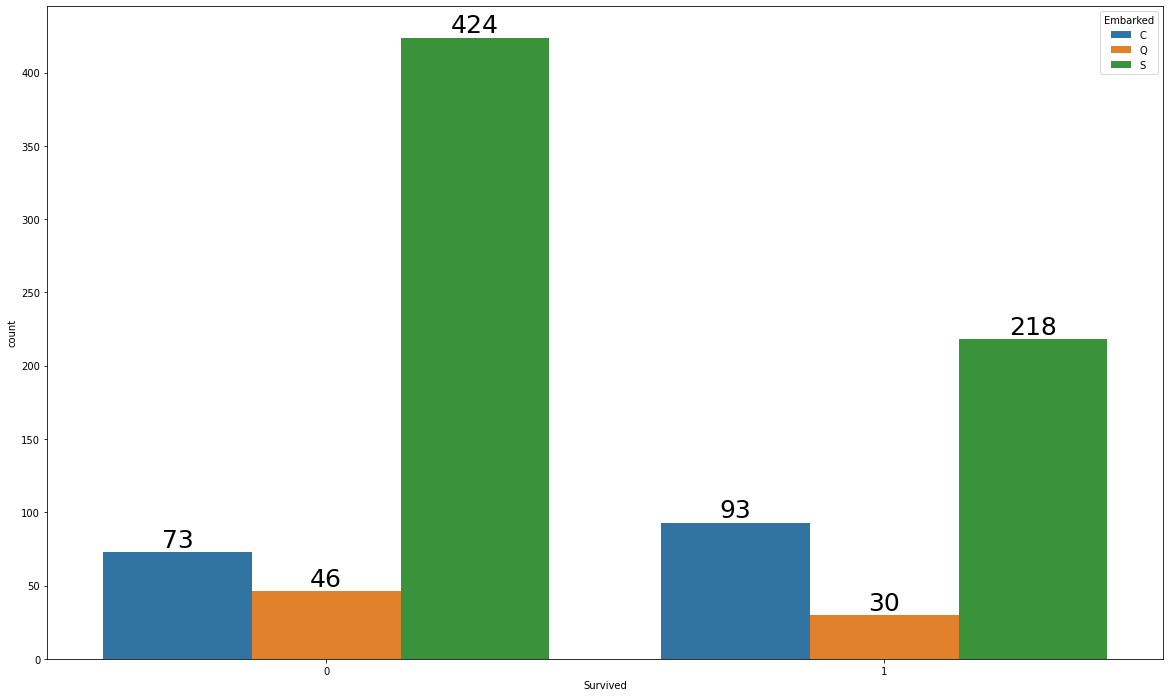

In [69]:
plt.figure(figsize=(20, 12))
survival_with_emberked = sns.countplot(df['Survived'], hue = df['Embarked'])
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis = 1)

ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), color='black', fontsize=25, ha='center', va='bottom')
plt.show()

# Survival with Age

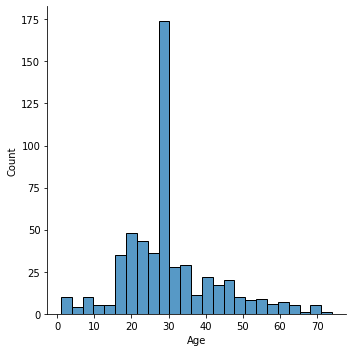

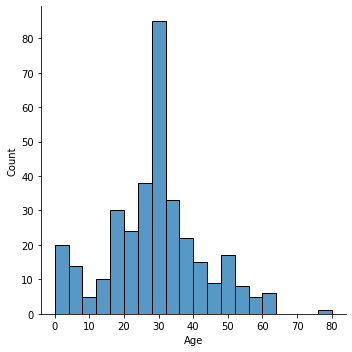

In [42]:
sns.displot(df[df['Survived']==0]['Age'])
sns.displot(df[df['Survived']==1]['Age'])

# Survived with Fare

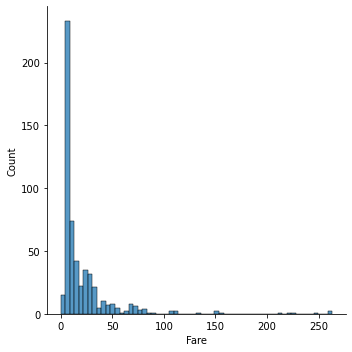

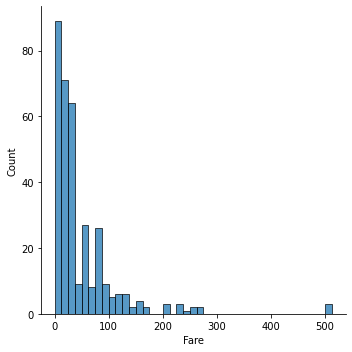

In [43]:
sns.displot(df[df['Survived']==0]['Fare'])
sns.displot(df[df['Survived']==1]['Fare'])

<Figure size 1440x720 with 0 Axes>

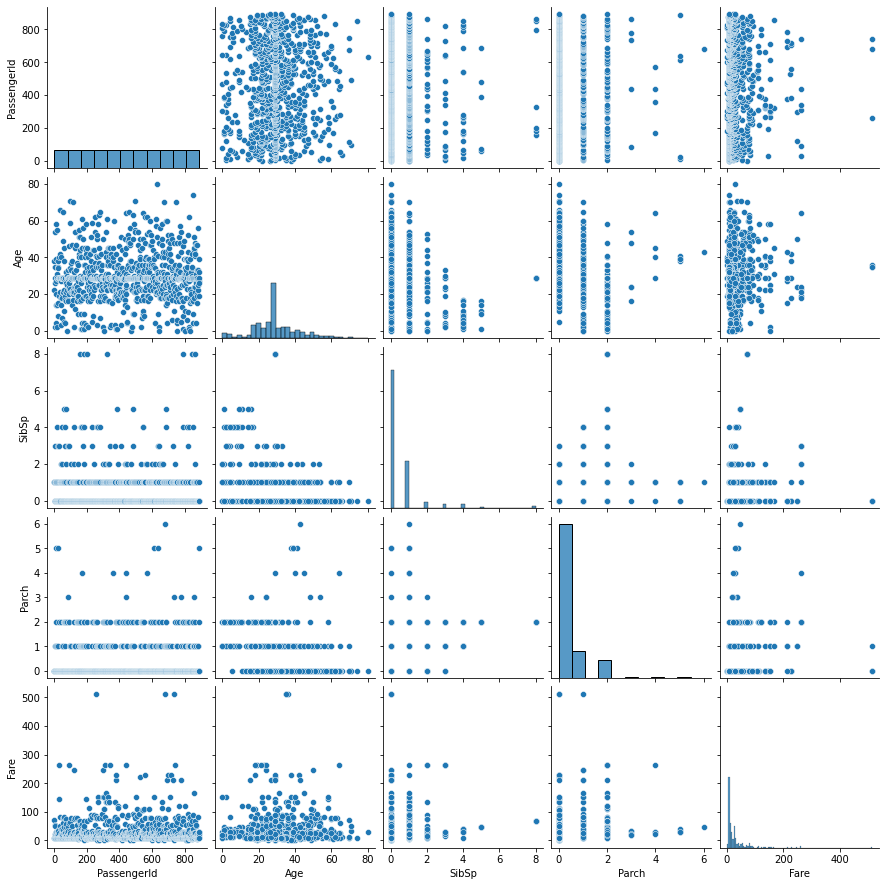

In [44]:
plt.figure(figsize=(20, 10))
sns.pairplot(df)
plt.show()

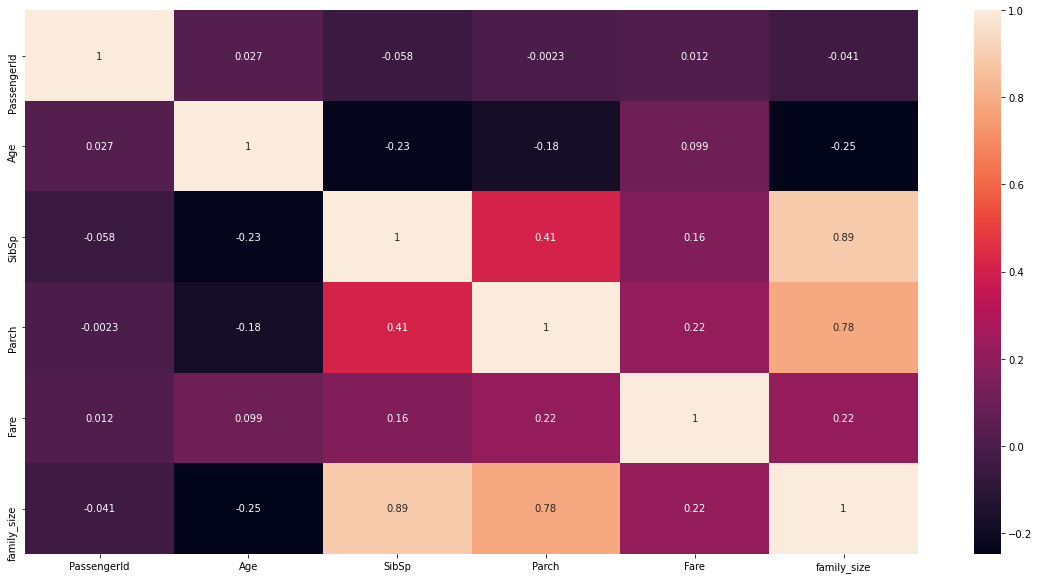

In [70]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [46]:
df['family_size'] = df['Parch'] + df['SibSp']
# random 5 ta dekhabe jekhane family_size thakbe
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
534,535,0,3,"Cacic, Miss. Marija",female,30,0,0,315084,8.6625,S,0
644,645,1,3,"Baclini, Miss. Eugenie",female,0,2,1,2666,19.2583,C,3
808,809,0,2,"Meyer, Mr. August",male,39,0,0,248723,13.0000,S,0
529,530,0,2,"Hocking, Mr. Richard George",male,23,2,1,29104,11.5000,S,3
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5,2,1,2666,19.2583,C,3


In [47]:
def family_type(number):
    if number==0:
        return 'Alone'
    elif number > 0 and number <= 4:
        return 'Medium'
    else:
        return 'Large'

In [48]:
df['family_type'] = df['family_size'].apply(family_type)

In [49]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3,4,2,347077,31.3875,S,6,Large
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27,0,0,350043,7.7958,S,0,Alone
534,535,0,3,"Cacic, Miss. Marija",female,30,0,0,315084,8.6625,S,0,Alone
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36,1,2,113760,120.0000,S,3,Medium
111,112,0,3,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,C,1,Medium


In [50]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis = 1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


In [51]:
df = df[df['Age'] <  (df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 13)